1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Answer. To perform a matrix multiplicaton between a (n, k) and (k, m) matrix, we need n*k*m multiplications and n*k*(m-1) additions.

Explanation:

Multiplication
In matrix multiplication, we multiply the corresponding elements in a row of the first matrix by the corresponding elements in a column of the second matrix and sum them up. Therefore k multiplications will be for (n, m) matrix. So total number of multiplications will be n*k*m.

Additions:
In the resulting matrix (n, m) the total number of additions within the rows is n*(k-1). So total number of additions is n*m*(k-1) which can be simplified to n*k*(m-1).

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
def multiplymatrices_lists(mat1,mat2):
    result = [[0 for _ in range(len(mat2[0]))] for _ in range(len(mat1))]
    
    for i in range(len(mat1)):
        for j in range(len(mat2[0])):
            for k in range(len(mat2)):
                result[i][j] += mat1[i][k]*mat2[k][j]
                
    return result

In [3]:
import numpy as np

def multiplymatrices_numpy(mat1,mat2):
    return np.dot(mat1, mat2)

NumPy is expected t be significantly faster for matrix operations due to its optimized C and Fortran libraries. It takes advantage of parallel processing and efficient memory usage, making it more suitable for numerical computations compared to pure Python lists of lists.

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer. Using the method described, finding the median of an array would require multiple passes, making the time complexity O(n^2), where n is the size of the array.

A more efficient method to find the median is to sort the array and then directly access the middle element. This can be done in O(n log n) time using efficient sorting algorithms like quicksort or mergesort.

In [ ]:
import numpy as np
import timeit

# Method 1: Finding median with multiple passes
def find_median_method1(arr):
    n = len(arr)
    for _ in range(n // 2 + 1):
        max_element = max(arr)
        arr.remove(max_element)
    return max_element

# Method 2: Finding median by sorting
def find_median_method2(arr):
    sorted_arr = sorted(arr)
    mid_index = len(arr) // 2
    if len(arr) % 2 == 0:
        return (sorted_arr[mid_index - 1] + sorted_arr[mid_index]) / 2
    else:
        return sorted_arr[mid_index]

# Compare with NumPy's median routine
arr = np.random.rand(10**6)  # Generating a large random array

time_method1 = timeit.timeit(lambda: find_median_method1(arr.tolist()), number=10)
time_method2 = timeit.timeit(lambda: find_median_method2(arr.tolist()), number=10)
time_numpy = timeit.timeit(lambda: np.median(arr), number=10)

In [ ]:
"Time taken by method 1:", time_method1

In [ ]:
"Time taken by method 2:", time_method2

In [ ]:
"Time taken by NumPy median routine:", time_numpy

4. What is the gradient of the following function with respect to x and y? $x^2y + y^3sin(x)$

Answer. The gradient of the function $f(x, y) = x^2y + y^3sin(x)$ with respect to x and y is: 
 $gradient f = 2xy + y^3cos(x), x^2 + 3y^2sin(x)$


5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [8]:
pip install jax jaxlib

     ---------------------------------------- 1.7/1.7 MB 181.0 kB/s eta 0:00:00
     -------------------------------------- 46.0/46.0 MB 138.1 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------ 127.8/127.8 kB 115.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, (0, 1))

x_val = 2.0
y_val = 1.5

analytical_grad = (2 * x_val * y_val + y_val**3 * jnp.cos(x_val), x_val**2 + 3 * y_val**2 * jnp.sin(x_val))

numerical_grad = grad_f(x_val, y_val)



In [3]:
"Analytical Gradient:", analytical_grad
"Numerical Gradient:", numerical_grad

('Numerical Gradient:',
 (Array(4.5955043, dtype=float32, weak_type=True),
  Array(10.137757, dtype=float32, weak_type=True)))

6. Use sympy to confirm that you obtain the same gradient analytically.

In [4]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)


x_val = 2.0
y_val = 1.5

analytical_grad_at_values = (df_dx.evalf(subs={x: x_val, y: y_val}),
                             df_dy.evalf(subs={x: x_val, y: y_val}))

print("Analytical Gradient at (x={}, y={}): {}".format(x_val, y_val, analytical_grad_at_values))


Analytical Gradient at (x=2.0, y=1.5): (4.59550442665339, 10.1377576310734)


In [5]:
"Partial derivative with respect to x:", df_dx
"Partial derivative with respect to y:", df_dy


('Partial derivative with respect to y:', x**2 + 3*y**2*sin(x))

7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [1]:
students_data = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        },
        'Branch 2': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        },
        'Branch 2': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        }
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        },
        'Branch 2': {
           1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        }
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        },
        'Branch 2': {
            1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}
        }
    }
}

In [2]:
# Example: Accessing data
"Marks for Roll Number 1 in 2022, Branch 1:", students_data[2022]['Branch 1'][1]['Marks']

('Marks for Roll Number 1 in 2022, Branch 1:', {'Maths': 100, 'English': 70})

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [5]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Creating instances for the given example
student1 = Student(1, 'N')
student1.add_subject_mark('Maths', 100)
student1.add_subject_mark('English', 70)

branch1_2022 = Branch('Branch 1')
branch1_2022.add_student(student1)

branch2_2022 = Branch('Branch 2')

year_2022 = Year(2022)
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

# Add more years, branches, and students as needed

# Overall database as a list of year objects
database = [year_2022]

In [6]:
"Marks for Roll Number 1 in 2022, Branch 1:", database[0].branches[0].students[0].marks


('Marks for Roll Number 1 in 2022, Branch 1:', {'Maths': 100, 'English': 70})

9. Using matplotlib plot the following functions on the domain: x=0.5 to 100.0 in steps of 0.5.

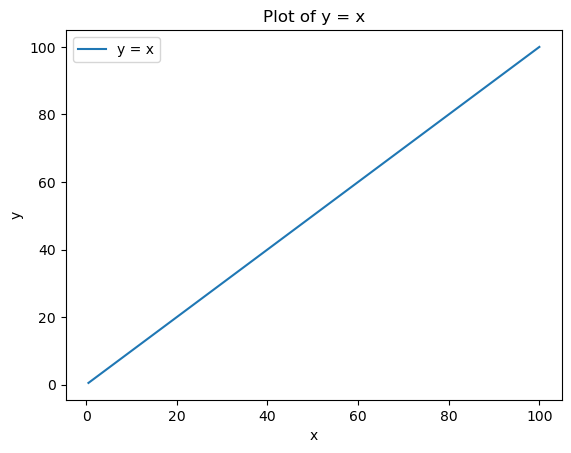

In [9]:
# y=x
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')

plt.legend()
plt.show()

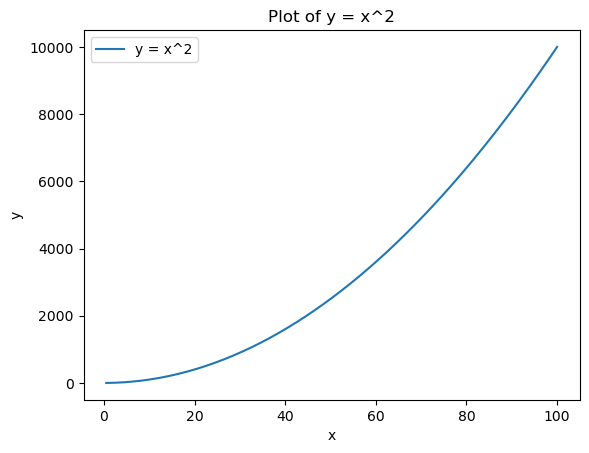

In [10]:
# y = x^2 
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x**2

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = x^2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')

plt.legend()
plt.show()

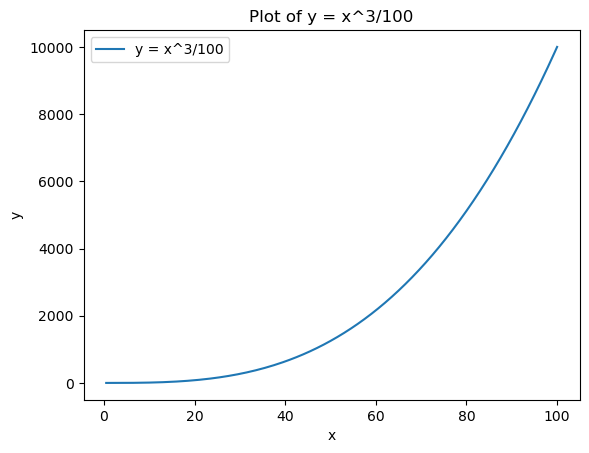

In [11]:
# y = x^3/100 
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return (x**3)/100

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = x^3/100')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')

plt.legend()
plt.show()

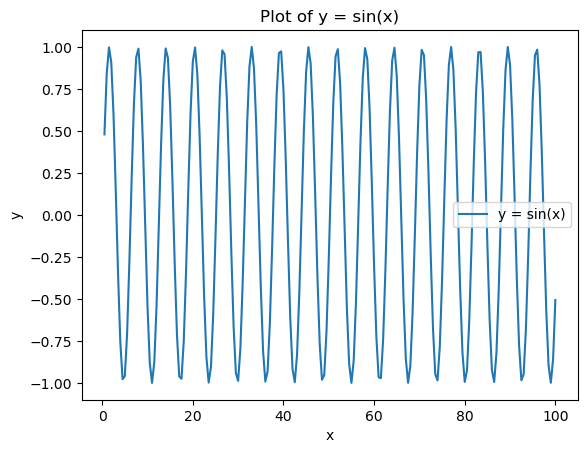

In [12]:
# y = sin(x)
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.sin(x)

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = sin(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')

plt.legend()
plt.show()

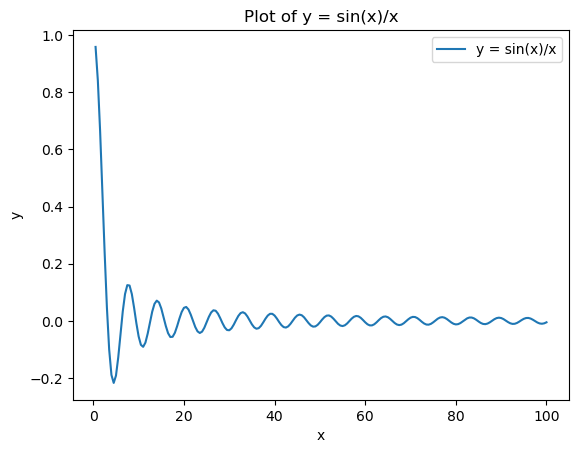

In [13]:
# y = sin(x)/x
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.sin(x) / x

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = sin(x)/x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')

plt.legend()
plt.show()

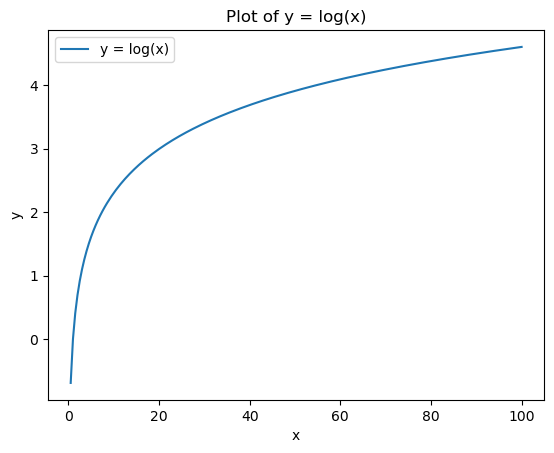

In [14]:
# y = log(x)
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.log(x)

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = log(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')

plt.legend()
plt.show()

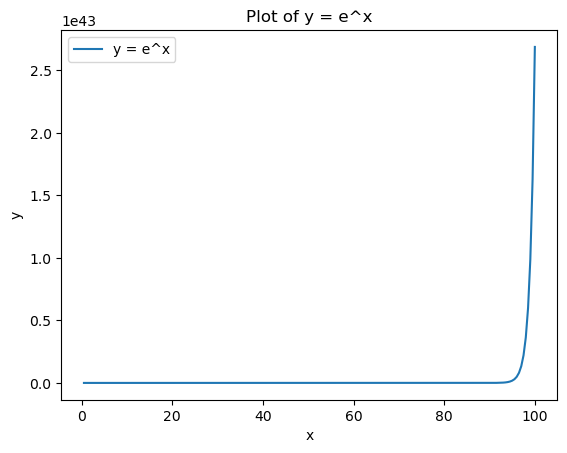

In [15]:
# y = e^x
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.exp(x)

x_values = np.arange(0.5, 100.5, 0.5)
y_values = func(x_values)

plt.plot(x_values, y_values, label='y = e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')

plt.legend()
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

max_std_column = df.std().idxmax()

min_mean_row = df.mean(axis=1).idxmin()

In [10]:
"DataFrame:", df

('DataFrame:',
            a         b         c         d         e
 0   1.875281  1.933770  1.344739  1.261692  1.576153
 1   1.399319  1.998931  1.107050  1.421006  1.632408
 2   1.690117  1.777279  1.173689  1.892004  1.647158
 3   1.144050  1.167721  1.475741  1.916006  1.272743
 4   1.748059  1.978471  1.217600  1.437328  1.891910
 5   1.864374  1.077092  1.527960  1.930331  1.124514
 6   1.243250  1.334600  1.377665  1.195152  1.443758
 7   1.686437  1.075981  1.341525  1.606661  1.002948
 8   1.034870  1.161761  1.433297  1.609246  1.930471
 9   1.395368  1.352803  1.209453  1.122633  1.808518
 10  1.132570  1.896155  1.971602  1.821504  1.624229
 11  1.344020  1.417450  1.501553  1.874193  1.844571
 12  1.338309  1.213510  1.654009  1.609684  1.764790
 13  1.596821  1.748832  1.538912  1.012828  1.837462
 14  1.306977  1.955462  1.020005  1.043409  1.861693
 15  1.361699  1.037977  1.380119  1.208259  1.572241
 16  1.446639  1.008092  1.885841  1.453814  1.587823
 17  1.266158

In [11]:
"Column with highest standard deviation:", max_std_column

('Column with highest standard deviation:', 'b')

In [12]:
"Row with lowest mean:", min_mean_row

('Row with lowest mean:', 17)

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [18]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = df[df['g'] == 'LT8'].shape[0]

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std() 

In [19]:
"Dataframe:", df

('Dataframe:',
            a         b         c         d         e         f    g
 0   1.875281  1.933770  1.344739  1.261692  1.576153  7.991636  LT8
 1   1.399319  1.998931  1.107050  1.421006  1.632408  7.558715  LT8
 2   1.690117  1.777279  1.173689  1.892004  1.647158  8.180248  GT8
 3   1.144050  1.167721  1.475741  1.916006  1.272743  6.976262  LT8
 4   1.748059  1.978471  1.217600  1.437328  1.891910  8.273368  GT8
 5   1.864374  1.077092  1.527960  1.930331  1.124514  7.524272  LT8
 6   1.243250  1.334600  1.377665  1.195152  1.443758  6.594425  LT8
 7   1.686437  1.075981  1.341525  1.606661  1.002948  6.713552  LT8
 8   1.034870  1.161761  1.433297  1.609246  1.930471  7.169645  LT8
 9   1.395368  1.352803  1.209453  1.122633  1.808518  6.888775  LT8
 10  1.132570  1.896155  1.971602  1.821504  1.624229  8.446060  GT8
 11  1.344020  1.417450  1.501553  1.874193  1.844571  7.981787  LT8
 12  1.338309  1.213510  1.654009  1.609684  1.764790  7.580301  LT8
 13  1.596821  1.74

In [20]:
"Number of rows where 'g' is 'LT8':", lt8_count

("Number of rows where 'g' is 'LT8':", 17)

In [21]:
"Standard deviation of 'f' for 'LT8':", std_lt8

("Standard deviation of 'f' for 'LT8':", 0.5421874219101931)

In [22]:
"Standard deviation of 'f' for 'GT8':", std_gt8

("Standard deviation of 'f' for 'GT8':", 0.13487613591963687)

12. Write a small piece of code to explain broadcasting in numpy.

In [5]:
import numpy as np

# Example arrays
a = np.array([[1,2,3], [4,5,6]])
b = np.array([2,3,4])

# Broadcasting addition (adding each element of b to each row of a)
result = a + b


In [6]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
b

array([2, 3, 4])

In [8]:
result

array([[ 3,  5,  7],
       [ 6,  8, 10]])

13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [1]:
import numpy as np

def custom_argmin(arr):
    return np.where(arr == arr.min())[0][0]

my_array = np.array([4,2,7,1,9])
result_index = custom_argmin(my_array)

In [6]:
'Custom argmin result:', result_index

('Custom argmin result:', 3)

In [7]:
'Numpy armin result:', np.argmin(my_array)

('Numpy armin result:', 3)